In [57]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import json
%matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv)

A description of the columns is below

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonLinkRatio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonLinkRatio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonLinkRatio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?
- These are websites that always relevant like recipies or reviews (as opposed to current events)
- Look at some examples

In [58]:
data = pd.read_csv('../../assets/datasets/train.csv', sep='\t', na_values='?')


In [59]:
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 29 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  5053 non-null object
alchemy_category_score            5053 non-null float64
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_

In [61]:
data.alchemy_category.value_counts()

recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [62]:
data1 = data._get_numeric_data()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 24 columns):
urlid                             7395 non-null int64
alchemy_category_score            5053 non-null float64
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_ratio                       7395 non-null float64
is_news                           4552 non-null float64
lengthyLinkDomain                 7395 non-null int64
linkw

In [63]:
data1.is_news.value_counts()

data1['is_news'].fillna(0, inplace=True)
data1.is_news.value_counts()

data[data['alchemy_category'] == 'unknown']['alchemy_category_score']
data1['alchemy_category_score'].fillna(0.400001, inplace=True)
data1.drop('news_front_page', axis=1, inplace=True)
data1.drop('framebased', axis=1, inplace=True)

In [64]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 22 columns):
urlid                             7395 non-null int64
alchemy_category_score            7395 non-null float64
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_ratio                       7395 non-null float64
is_news                           7395 non-null float64
lengthyLinkDomain                 7395 non-null int64
linkwordscore                     7395 non-null int64
non_m

In [65]:
data1.corr()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
urlid,1.000000,0.006727,-0.011162,0.002856,0.008407,0.005285,0.009573,-0.007343,0.013340,0.010065,-0.005802,0.016989,-0.000590,0.016746,-0.007780,-0.013668,0.016732,-0.002019,-0.017342,-0.005868,0.002292,0.013450
alchemy_category_score,0.006727,1.000000,0.002284,0.068481,0.051463,0.027334,0.021002,-0.187735,0.170386,-0.037692,0.008129,0.000297,-0.027506,0.156256,0.132524,-0.053113,0.031857,0.044925,0.155613,-0.017882,-0.095607,-0.038373
avglinksize,-0.011162,0.002284,1.000000,0.120467,0.161769,0.174554,0.134527,-0.003578,0.005254,-0.049270,-0.002046,0.018974,-0.003002,-0.064014,0.020852,0.122550,-0.010982,0.000360,-0.033890,0.006089,0.035393,0.006172
commonlinkratio_1,0.002856,0.068481,0.120467,1.000000,0.808047,0.560584,0.388801,-0.017878,0.005280,-0.294860,0.006790,-0.201501,-0.064435,0.082044,0.421284,0.257200,0.193914,0.317293,0.144354,-0.078026,-0.035019,0.083364
commonlinkratio_2,0.008407,0.051463,0.161769,0.808047,1.000000,0.758330,0.555148,-0.032460,0.019387,-0.259222,0.000263,-0.159702,-0.044663,0.076389,0.398817,0.257594,0.177785,0.311492,0.096940,-0.079485,-0.027888,0.083488
commonlinkratio_3,0.005285,0.027334,0.174554,0.560584,0.758330,1.000000,0.850604,-0.016188,0.007578,-0.218559,-0.031097,-0.133370,-0.050357,0.082562,0.363159,0.109654,0.264022,0.283924,0.049203,-0.008652,-0.008599,0.105964
commonlinkratio_4,0.009573,0.021002,0.134527,0.388801,0.555148,0.850604,1.000000,-0.020415,0.005473,-0.178064,-0.052519,-0.136561,-0.038071,0.112934,0.287159,0.059223,0.162883,0.233898,0.026384,0.036387,-0.013507,0.080464
compression_ratio,-0.007343,-0.187735,-0.003578,-0.017878,-0.032460,-0.016188,-0.020415,1.000000,-0.889345,0.159335,0.027657,0.106335,-0.188976,-0.122866,-0.090325,0.146470,-0.064163,-0.055388,-0.042614,-0.033772,0.364122,-0.059737
embed_ratio,0.013340,0.170386,0.005254,0.005280,0.019387,0.007578,0.005473,-0.889345,1.000000,-0.130753,-0.026473,-0.090938,0.183808,0.083488,0.075322,-0.108476,0.046484,0.042942,0.043343,0.037361,-0.342206,0.039536
frameTagRatio,0.010065,-0.037692,-0.049270,-0.294860,-0.259222,-0.218559,-0.178064,0.159335,-0.130753,1.000000,0.010193,0.384937,-0.088847,0.040760,-0.196673,0.158874,-0.303682,-0.362491,0.049330,-0.094557,0.033663,-0.187762


In [ ]:
data1.head()

In [179]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

X = data1.drop(['label'], axis=1)
y = data1.label

selector = SelectKBest(f_classif, k=8)
selected_data = selector.fit_transform(X, y)

kbest_columns = X.columns[selector.get_support()]
Xbest_K = pd.DataFrame(selected_data, columns=kbest_columns)

print kbest_columns
print Xbest.shape

Index([u'commonlinkratio_1', u'commonlinkratio_2', u'commonlinkratio_3',
       u'commonlinkratio_4', u'frameTagRatio', u'linkwordscore',
       u'non_markup_alphanum_characters', u'numberOfLinks'],
      dtype='object')
(7395, 8)


In [180]:
# Regularization L1

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import SelectFromModel

X = data1.drop(['label'], axis=1)
y = data1.label

logreg_cv = LogisticRegressionCV(Cs=10, cv=5, penalty='l1', scoring='accuracy', solver='liblinear')

model = SelectFromModel(logreg_cv, threshold=0.20)
reg = model.fit(X, y)

X_new = reg.transform(X)
kbest_columns = X.columns[reg.get_support()]

Xbest_L1 = pd.DataFrame(X_new, columns=kbest_columns)

print kbest_columns
print Xbest_L1.shape

Index([u'alchemy_category_score', u'commonlinkratio_1', u'commonlinkratio_2',
       u'commonlinkratio_3', u'commonlinkratio_4', u'embed_ratio',
       u'frameTagRatio', u'spelling_errors_ratio'],
      dtype='object')
(7395, 8)


In [181]:
# Regularization L2

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import SelectFromModel

X = data1.drop(['label'], axis=1)
y = data1.label

logreg_cv = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', scoring='accuracy', solver='liblinear')

model = SelectFromModel(logreg_cv, threshold=0.20)
reg = model.fit(X, y)

X_new = reg.transform(X)
Lbest_columns = X.columns[model.get_support()]

print Lbest_columns
print X_new.shape

Index([u'alchemy_category_score', u'commonlinkratio_1', u'commonlinkratio_2',
       u'commonlinkratio_3', u'frameTagRatio'],
      dtype='object')
(7395, 5)


In [183]:
# Recursive feature elimination
from sklearn.feature_selection import RFE, RFECV

X = data1.drop(['label'], axis=1)
y = data1.label

model = LogisticRegression()

rfe = RFE(estimator=model, n_features_to_select=8, step=1)
rfe.fit(X, y)

X_new = rfe.transform(X)
kbest_columns = X.columns[rfe.get_support()]

Xbest_RFE = pd.DataFrame(X_new, columns=kbest_columns)

print kbest_columns
print X_new.shape

Index([u'alchemy_category_score', u'commonlinkratio_1', u'commonlinkratio_2',
       u'commonlinkratio_3', u'commonlinkratio_4', u'frameTagRatio',
       u'html_ratio', u'spelling_errors_ratio'],
      dtype='object')
(7395, 8)


In [163]:
# Use what we learnt in Feature Engineering to construct new features

from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=100, # Only use the top 50 most common words
)

# This builds a matrix with a row per website (or data point) and column per word (using all words in the dataset)
X_title = v.fit_transform(data.boilerplate).todense()
X_title = pd.DataFrame(X_title, columns=v.get_feature_names())
X_title.head()

,10,12,15,20,2011,30,add,bake,baking,best,better,blog,body,bowl,brown,butter,com,come,cook,cooking,cool,cream,cup,cups,cut,...,salt,say,set,simple,small,sugar,sure,things,think,time,title,try,url,use,used,using,ve,want,water,way,white,work,world,year,years
0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,0,1,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0
4,1,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,1,1,0,1,...,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,1


In [164]:
# feature selection by L1 regularization for text features
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import SelectFromModel

logreg_cv = LogisticRegressionCV(Cs=10, cv=5, penalty='l1', scoring='accuracy', solver='liblinear')

model = SelectFromModel(logreg_cv, threshold=0.20)
reg = model.fit(X_title, y)

X_titlenew = reg.transform(X_title)

kbest_columns = X_title.columns[reg.get_support()]
Xbest_titleL1 = pd.DataFrame(X_titlenew, columns=kbest_columns)

print kbest_columns
print Xbest_titleL1.shape

Index([u'better', u'brown', u'butter', u'come', u'cook', u'cooking', u'cup',
       u'easy', u'eat', u'food', u'free', u'going', u'good', u'health',
       u'large', u'look', u'make', u'minutes', u'new', u'news', u'recipe',
       u'recipes', u'salt', u'say', u'sugar', u'think', u'url', u'world',
       u'year'],
      dtype='object')
(7395, 29)


In [187]:
# Train a logit model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cross_validation import train_test_split, cross_val_score

def logit(dataframe):
    X = dataframe
    y = data['label']

    logreg = LogisticRegression()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    idx = ['Green', 'Not Green']
    col = ['Predicted Green', 'Predicted not Green']
    cmdf = pd.DataFrame(cm, index=idx, columns=col)
    print cmdf
    print classification_report(y_test, y_pred)
    
print "============= K best ===============" 
logit(Xbest_K)
print "=============L1 Regularization===============" 
logit(Xbest_L1)
print "============= RFE ===============" 
logit(Xbest_RFE)
print "============= Text features ===============" 
logit(Xbest_titleL1)

============= K best ===============
           Predicted Green  Predicted not Green
Green                  518                  680
Not Green              308                  935
             precision    recall  f1-score   support

          0       0.63      0.43      0.51      1198
          1       0.58      0.75      0.65      1243

avg / total       0.60      0.60      0.58      2441

=============L1 Regularization===============
           Predicted Green  Predicted not Green
Green                  540                  658
Not Green              344                  899
             precision    recall  f1-score   support

          0       0.61      0.45      0.52      1198
          1       0.58      0.72      0.64      1243

avg / total       0.59      0.59      0.58      2441

============= RFE ===============
           Predicted Green  Predicted not Green
Green                  544                  654
Not Green              338                  905
             precisio

In [192]:
# Combining best features from L1 regularization and Best Keywords from Boilerplate 
X_final = pd.concat([Xbest_L1,Xbest_titleL1], axis=1)

print "======Combining best features from L1 regularization and best keywords from Boilerplate===="
logit(X_final)

======Combining best features from L1 regularization and best keywords from Boilerplate====
           Predicted Green  Predicted not Green
Green                 1070                  128
Not Green              379                  864
             precision    recall  f1-score   support

          0       0.74      0.89      0.81      1198
          1       0.87      0.70      0.77      1243

avg / total       0.81      0.79      0.79      2441



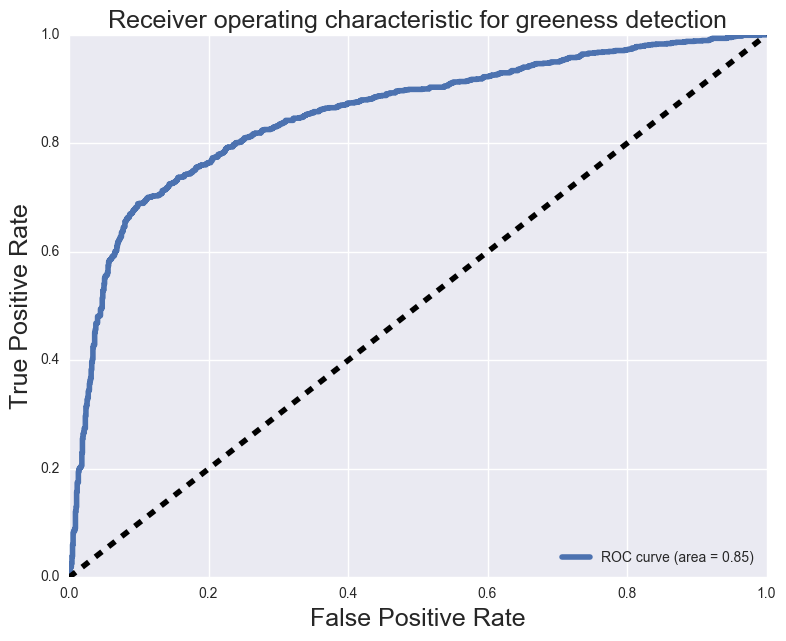

In [200]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

Y_score = logreg.decision_function(X_test)
Y_proba_score = logreg.predict_proba(X_test)

FPR, TPR, thresholds = roc_curve(y_test, Y_proba_score[:,1])

ROC_AUC = auc(FPR, TPR)

plt.figure(figsize=[9,7])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)

plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for greeness detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Conclusion